<a href="https://colab.research.google.com/github/Zahab163/ML_notes/blob/main/Clustering_visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clustering visuals

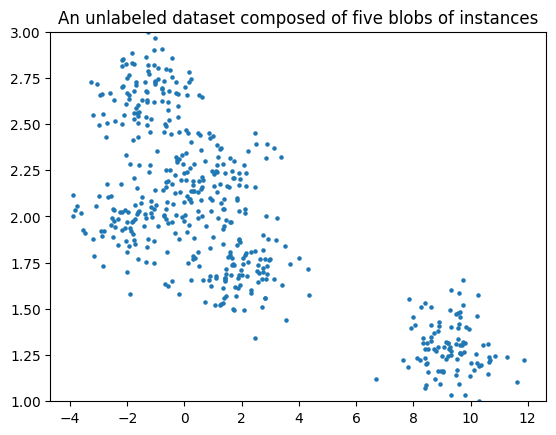

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate the dataset with a wider y-axis range
X, y = make_blobs(n_samples=500, centers=5, n_features=2, random_state=0)

# Calculate the minimum and maximum y-values
y_min, y_max = np.min(X[:, 1]), np.max(X[:, 1])

# Scale and shift the y-values to fit within the desired range
X[:, 1] = (X[:, 1] - y_min) / (y_max - y_min)  # Normalize to 0-1 range
X[:, 1] = X[:, 1] * 2 + 1  # Scale and shift to 1-3 range

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.xlabel('')
plt.ylabel('')
plt.title('An unlabeled dataset composed of five blobs of instances')
plt.ylim(1, 3)  # Set the y-axis limits
plt.show()

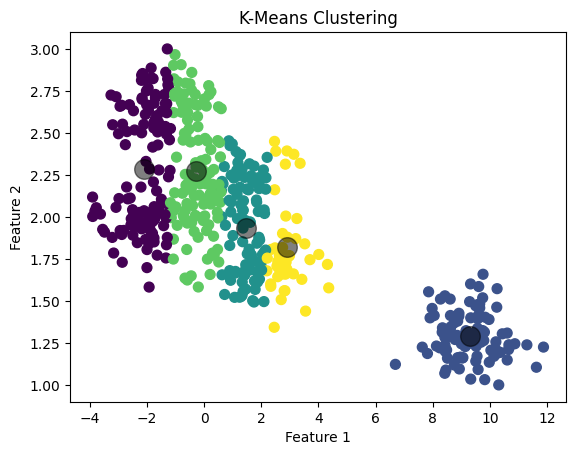

In [ ]:
# Apply K-Means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot the centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()



In [ ]:
kmeans.cluster_centers_


array([[-2.08157951,  2.2860054 ],
       [ 9.30286933,  1.2933211 ],
       [ 1.45191584,  1.93528084],
       [-0.26339435,  2.272796  ],
       [ 2.88833966,  1.82270343]])

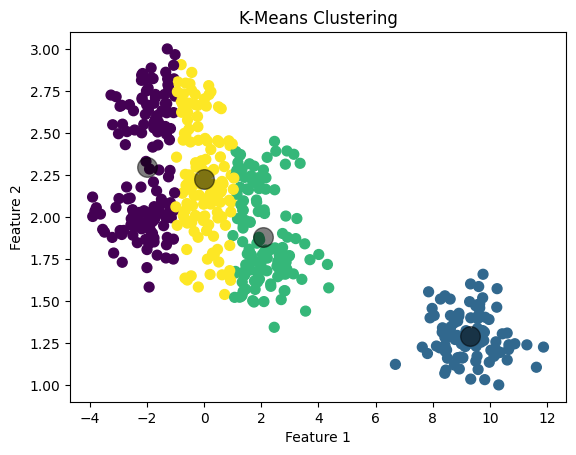

In [ ]:
# Apply K-Means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot the centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()



In [ ]:
kmeans.cluster_centers_


array([[-1.9868873 ,  2.29735081],
       [ 9.30286933,  1.2933211 ],
       [ 2.05853913,  1.87879368],
       [-0.0152509 ,  2.223925  ]])

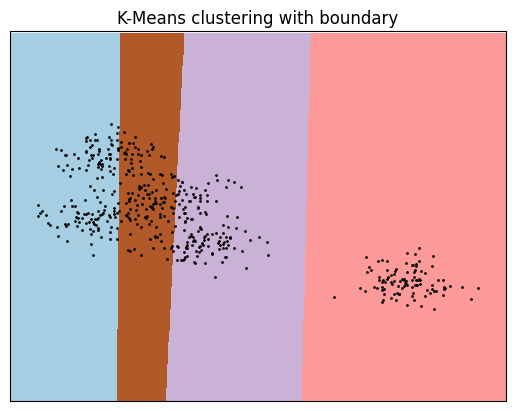

In [ ]:
# Create a meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict cluster labels for each point in the meshgrid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot the decision boundaries
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
plt.title('K-Means clustering with boundary')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
